## Classification

sumber data: https://www.kaggle.com/datasets/adityakadiwal/water-potability

Akses terhadap air minum yang aman sangat penting bagi kesehatan, merupakan hak asasi manusia dan komponen kebijakan yang efektif untuk perlindungan kesehatan. Hal ini penting sebagai isu kesehatan dan pembangunan di tingkat nasional, regional dan lokal. Di beberapa wilayah, investasi pada penyediaan air dan sanitasi terbukti dapat menghasilkan manfaat ekonomi, karena pengurangan dampak buruk terhadap kesehatan dan biaya layanan kesehatan lebih besar daripada biaya yang dikeluarkan untuk melakukan intervensi.

Pada kolom Potability, kelas 0 berarti air tidak aman untuk diminum dan kelas 1 berarti air aman untuk diminum.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
path = '/content/drive/MyDrive/portofolio/'

In [24]:
# Load data
df = pd.read_csv(os.path.join(path, "water_potability.csv"))
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Data Preparation

In [25]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- Tipe data sudah sesuai
- Terdapat missing value pada beberapa variabel. Dilakukan penghapusan missing value terlebih dahulu.

In [26]:
# Menghapus missing value
df = df.dropna()

# Missing value dicek kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


Sudah tidak ada misisng value pada data setelah dilakukan penghapusan. Data awal ada 3276 baris, saat ini data tersisa 2011 baris.

In [27]:
# Cek duplicate
duplicate = df[df.duplicated(keep=False)]
duplicate

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


tidak ada data duplikasi, data siap diolah lebih lanjut.

### Eksplorasi Data

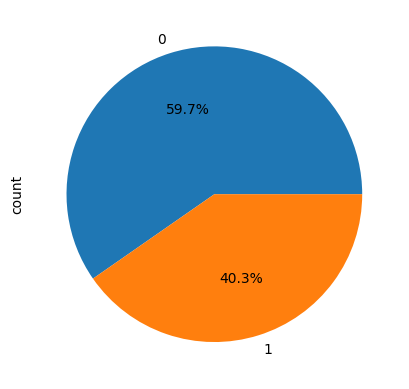

In [28]:
# Mencari perbandingan label/class
df['Potability'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False)
plt.show()

Dari 2011 data, 40.3% data merupakan data air yang potable, sedangkan 59.7% merupakan data air yang tidak potable

In [29]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [30]:
df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.067201,196.008440,21628.535122,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181
1,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254


Rata-rata setiap kolom berdasarkan kelasnya

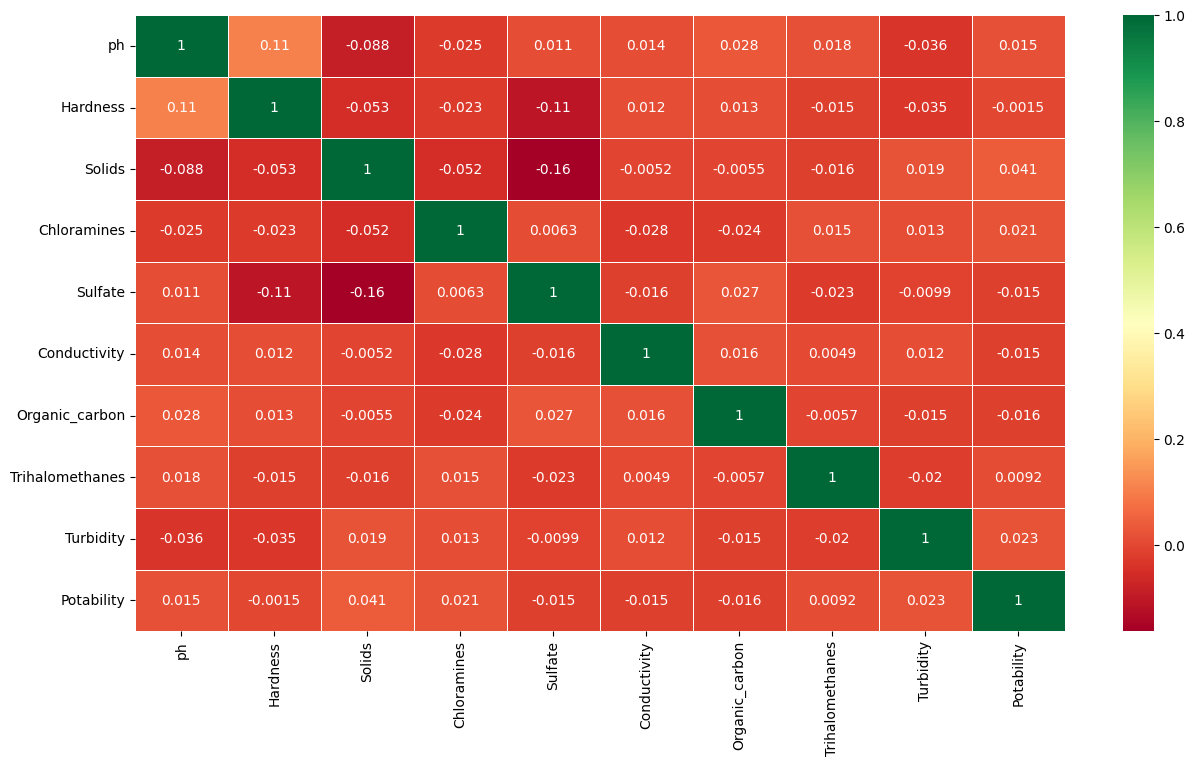

In [36]:
# Melakukan perhitungan nilai korelasi
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Korelasi antara kolom Potability dengan variabel lain sangat lemah, nilainya hampir mendekati 0. Dapat juga dikatakan bahwa kolom Potability tidak memiliki korelasi dengan variabel lain.

## Membangun model klasifikasi

In [37]:
# Split data
X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  1407
y Train :  1407
X Test :  604
t Test :  604


### Regresi Logistik

In [38]:
Input = sm.add_constant(X_train)

In [39]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.669516
         Iterations 4
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: Potability       Pseudo R-squared: 0.005    
Date:               2024-04-05 23:10 AIC:              1902.0186
No. Observations:   1407             BIC:              1949.2616
Df Model:           8                Log-Likelihood:   -942.01  
Df Residuals:       1398             LL-Null:          -946.60  
Converged:          1.0000           LLR p-value:      0.32689  
No. Iterations:     4.0000           Scale:            1.0000   
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
ph                 0.0347   0.0345  1.0055 0.3147 -0.0329 0.1022
Hardness          -0.0012   0.0015 -0.7674 0.4429 -0.0042 0.0018
Solids       

In [40]:
# Prediksi Model
prediction = result.predict(X_test)

In [41]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
2144,0.398153,0,0
854,0.437149,0,0
637,0.424054,0,0
2299,0.453004,0,0
706,0.357405,0,1


In [42]:
# Model Evaluation
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.598
Test precision =  0.800
Test recall =  0.032
Test f-score =  0.062


### SVM

In [43]:
# SVM dgn kernel linear
classifier = SVC(kernel = 'linear', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#akurasi test data
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.597682119205298


In [44]:
# SVM dgn rbf
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#akurasi test data
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.5877483443708609


Dilihat dari akurasi data tes model dengan regresi logistik, SVM kernel linear, dan SVM kernel rbf, akurasi paling besar sebesar 0.598 dengan menggunakan model regresi logistik.

Model yg dihasilkan dapat dikatakan kurang baik, sehingga diberikan saran untuk pengolahan lain dengan memperhatikan beberapa hal berikut:

1. Mengecek dan mengatasi outlier
2. Menyeimbangkan data Potability kelas 0 dan 1
3. Menambah variabel yang memiliki korelasi tinggi dengan potability